In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LassoLars, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV, BayesianRidge
from keras.models import Sequential
from keras.layers import Dense
from keras.constraints import max_norm
%matplotlib inline

np.random.seed(13)

from collections import Counter

Using TensorFlow backend.


In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


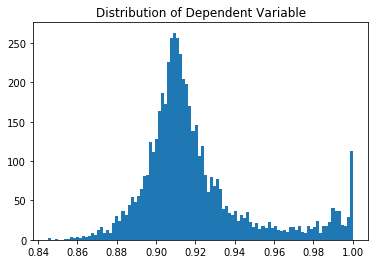

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [8]:
# Fit unregularized linear regression and see RMSE on training set
linReg = Lin_Reg()
linReg.fit(X_train, y_train)

print "Training RMSE: ", scoreRMSE(linReg, X_train, y_train)

Training RMSE:  0.02635316898374967


In [ ]:
# attempt at Bayesian
# reg = BayesianRidge().fit(X_train, y_train)
# score = scoreRMSE(reg, X_train, y_train)
# print(score)

In [97]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# https://stats.stackexchange.com/questions/350718/confused-in-selecting-the-number-of-hidden-layers-and-neurons-in-an-mlp-for-a-bi
# attempt at neural network
from keras.constraints import maxnorm
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout

In [ ]:
# compile model
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
def run_models(seeds):
    predictions_all = [[] for x in xrange(len(seeds))]
    for s in range(len(seeds)):
        np.random.seed(seeds[s])
        model = Sequential()
        model.add(Dense(376, input_dim=251, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dense(128, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(64, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.3))
        model.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, kernel_initializer = 'normal', activation='sigmoid'))
        
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
        
        # https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64,  verbose=2)
        
        # https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
        plt.clf()
        plt.plot(np.log(history.history['loss']))
        plt.plot(np.log(history.history['val_loss']))
        plt.title('model loss with seed' + str(seeds[s]))
        plt.ylabel('log(loss)')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        predictions = model.predict(X_test)
        predictions_all[s] = predictions
    return predictions_all

In [ ]:
# predict NN
predictions_all = run_models([23, 37, 97])
predictions = np.mean(predictions_all, axis=0)

In [ ]:
def adjust_final_distribution():
    # mean and sd
    train_mean = np.mean(train['Target'])
    train_std = np.std(train['Target'])
    # train_mean = np.mean(train.loc[train['Target'] < 0.98]['Target'])
    # train_std = np.std(train.loc[train['Target'] < 0.98]['Target'])
    print(train_mean, train_std)

    # readjust distribution
    y_predictions = model.predict(X_train)
    plt.clf()
    plt.hist(y_predictions, bins = 100)
    plt.show()

    # https://stats.stackexchange.com/questions/46429/transform-data-to-desired-mean-and-standard-deviation
    test_mean = np.mean(y_predictions)
    test_std = np.std(y_predictions)
    print(test_mean, test_std)

    y_predictions_adj = test_mean + (y_predictions -  train_mean) * test_std / train_std
    plt.clf()
    plt.hist(y_predictions_adj, bins = 100)
    plt.show()
    
    # plot predicted model, predicted model with adjustment, truth
    plt.clf()
    ax1 = plt.subplot(131)
    ax1.plot(range(0, len(X_train)), y_train, label = "truth")
    ax1.set_ylim([0,1.5])

    ax2 = plt.subplot(132)
    ax2.plot(range(0, len(X_train)), y_predictions, label = "model")
    ax2.set_ylim(0,1.5)

    ax3 = plt.subplot(133)
    ax3.plot(range(0, len(X_train)), y_predictions_adj, label = "adjusted")
    ax3.set_ylim(0,1.5)
    
    # adjusted error
    no_adj_loss = np.sqrt(mean_squared_error(y_predictions, y_train))
    adj_loss = np.sqrt(mean_squared_error(y_predictions_adj, y_train))
    print(no_adj_loss)
    print(adj_loss)

    # evaluate model
    loss = scoreRMSE(model, X_train, y_train)
    loss

In [ ]:
# plot optimal alpha vs. loss for functions
def cross_validation(functions_opt, functions, alphas_vals, labels):
    scores = []
    alphas_opt = []
    
    predictions_all = [[] for x in xrange(len(functions))]
    
    for index in range(len(functions)):
        reg = functions_opt[index](alphas = alphas_vals, cv=10).fit(X_train, y_train)
        alphas_opt.append(reg.alpha_)
        print(reg.alpha_)
        reg_opt = functions[index](alpha=reg.alpha_).fit(X_train, y_train)
        predict = reg_opt.predict(X_test)
        predictions_all[index] = predict
#         score = scoreRMSE(reg_opt, X_train, y_train)
#         scores.append(score)
    
#     index = np.arange(len(labels))
#     plt.clf()
#     plt.bar(index, scores)
#     plt.xlabel('model', fontsize=5)
#     plt.ylabel('scoreRMSE', fontsize=5)
#     plt.xticks(index, labels, fontsize=5, rotation=30)
#     plt.show()
    
    return predictions_all

In [ ]:
predictions_all = cross_validation([LassoCV], [Lasso], np.linspace(0.01,50,200), ['lasso'])
predictions = np.mean(predictions_all, axis=0)

In [ ]:
# trying cross_validation
# reg = LassoCV(cv=10, random_state=0).fit(X_train, y_train)
# reg = LassoLarsCV(cv=10).fit(X_train, y_train)
reg = ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train)

In [ ]:
def plot_performance(functions, alpha_vals, labels):
    scores =[[] for x in xrange(len(functions))]
    predictions_all = [[] for x in xrange(len(functions))]
    
    for alpha_val in alpha_vals:
        for index in range(len(functions)):
            reg = functions[index](alpha=alpha_val).fit(X_train, y_train)
            predict = reg_opt.predict(X_test)
            predictions_all[index] = predict
            score = scoreRMSE(reg, X_train, y_train)
            scores[index].append(score)
            
    plt.clf()
    for loss in scores:
        plt.plot(alpha_vals, loss)
    plt.legend(labels, loc='bottom left')
    plt.show()
    return predictions_all

In [ ]:
plot_performance([Ridge, Lasso, ElasticNet], np.linspace(0.01,100,200), ['ridge', 'lasso', 'elasticnet'])

In [9]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [ ]:
# Make predictions with our model
predictions = model.predict(X_test)

In [ ]:
# Make predictions using linear regression model fitted above
# predictions = linReg.predict(X_test)

In [162]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.935183
1,2,0.913122
2,3,0.916378
3,4,0.927222
4,5,0.934416


In [163]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("Single_feature_LGBM_Random_Search_Log2_submission.csv", index=False)

In [10]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

/Users/christinejou/anaconda/lib/python2.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [11]:
# Cross-Validation
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=97).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [12]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=720,
                              max_bin = 30, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.65,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [48]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0274 (0.0012)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_xgb)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [19]:
score = rmsle_cv(model_lgb)
print("lightgbm score: ", score.mean(), "(", score.std(), ")")

('lightgbm score: ', 0.026927759992079643, '(', 0.0012218959301145062, ')')


In [ ]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
predictions = lgb_train_pred

In [ ]:
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
predictions = lasso_pred

In [ ]:
KRR.fit(X_train, y_train)
KRR_pred = KRR.predict(X_test)
predictions = KRR_pred

In [ ]:
plt.hist(lgb_train_pred, bins = 100)
plt.show()

In [41]:
# np.sqrt(mean_squared_error(lgb_train_pred, y_train))

In [113]:
def remove_single_feature(X_train, X_test):
    cols = X_train.columns
    single_val = []
    for index in cols:
        if (len(X_train[index].unique()) == 1):
            single_val.append(index)

    test_val = []
    for index in single_val:
        if (len(X_test[index].unique()) == 1):
            test_val.append(index)
            
    single_feature = list(set(single_val).intersection(set(test_val)))
    
    X_single_train = X_train.drop(columns=single_feature)
    X_single_test = X_test.drop(columns=single_feature)

    return X_single_train, X_single_test, single_feature

In [114]:
X_single_train, X_single_test, single_feature = remove_single_feature(X_train, X_test)

In [159]:
# Cross-Validation
n_folds = 10

def rmsle_cv_single(model, X, Y):
    kf = KFold(n_folds, shuffle=True, random_state=97).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def train_lgb(X_train, X_test, y):
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=51,
                                  learning_rate = 0.01, n_estimators=300,
                                  max_bin = 30, bagging_fraction = 0.65,
                                  bagging_freq = 5, feature_fraction = 0.65,
                                  feature_fraction_seed=13, bagging_seed=13,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    score = rmsle_cv_single(model_lgb, X_train, y_train)
    print("lightgbm score: ", score.mean(), "(", score.std(), ")")
    model_lgb.fit(X_train, y_train)
    lgb_train_pred = model_lgb.predict(X_test)
    return lgb_train_pred

In [33]:
# np.sqrt(mean_squared_error(lgb_train_pred, y_train))

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
def scale_and_pca(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train.values)
    X_train_scale = scaler.transform(X_train.values)
    X_test_scale = scaler.transform(X_test.values)
    
    pca = PCA(0.99)
    
    pca.fit(X_train_scale)
    
    X_train_scale_pca = pca.transform(X_train_scale)
    X_test_scale_pca = pca.transform(X_test_scale)
    
    return X_train_scale_pca, X_test_scale_pca

In [91]:
X_train_scale_pca, X_test_scale_pca = scale_and_pca(X_single_train, X_single_test)

In [18]:
def get_linear_loss(X):
    linReg = Lin_Reg()
    linReg.fit(X, y_train)

    print "Training RMSE: ", scoreRMSE(linReg, X, y_train)

In [89]:
get_linear_loss(X_train_scale_pca)

Training RMSE:  0.02682121907766576


In [146]:
get_linear_loss(X_single_train)

Training RMSE:  0.0263531688357


In [147]:
get_linear_loss(X_train)

Training RMSE:  0.0263531688357


In [19]:
def remove_high_correlation(X_train, X_test):
    corr_matrix = X_train.corr().abs()
    high_corr_var=np.where(corr_matrix>0.999)
    high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
    
    remove_vars = [i[0] for i in high_corr_var]
    print(remove_vars)
    
    X_corr_train = X_train.drop(columns=remove_vars)
    X_corr_test = X_test.drop(columns=remove_vars)
    return X_corr_train, X_corr_test

In [35]:
new_X, new_test = remove_high_correlation(X_single_train, X_single_test)

['Feat 19', 'Feat 96']


In [123]:
train1_rsa, test1_rsa = scale_and_pca(X_single_train, X_single_test)

In [92]:
get_linear_loss(train1_rsa)

Training RMSE:  0.02682121907766576


In [133]:
predictions = train_lgb(train1_rsa, test1_rsa, y_train)

('lightgbm score: ', 0.027233035282325423, '(', 0.0011826687850171951, ')')


In [50]:
###
epsilon_X_train = X_single_train.replace(0, 10 ** (-100))
epsilon_X_test = X_single_test.replace(0, 10 ** (-100))
log_e_X_train = np.log(epsilon_X_train)
log_e_X_test = np.log(epsilon_X_test)

In [51]:
get_linear_loss(log_e_X_train)

Training RMSE:  0.02649037403657469


In [72]:
# original 5 leaves, 720
predictions = train_lgb(X_single_train, X_single_test, y_train)

('lightgbm score: ', 0.026656433029968646, '(', 0.0012339408403312694, ')')


In [25]:
# stds = list(X_train.std(axis = 1))
# [i for i in stds if i >= 0.2]

In [160]:
# original 63 leaves, 720
predictions = train_lgb(X_single_train, X_single_test, y_train)

('lightgbm score: ', 0.02658367299748282, '(', 0.0012370012597613866, ')')


In [94]:
# random search
predictions = train_lgb(X_single_train, X_single_test, y_train)

('lightgbm score: ', 0.0266531898208971, '(', 0.0012361313943701439, ')')


In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

clf = lgb.LGBMRegressor(objective='regression',
                                  learning_rate = 0.01,
                                  max_bin = 30, bagging_freq = 5,
                                  feature_fraction_seed=13, bagging_seed=13,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, max_depth = 8)

# use a full grid over all parameters
param_dist = {"num_leaves": [31,36,41,46,51,56,61,63],
              "feature_fraction": [0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
              "n_estimators": [100, 200, 300],
              "bagging_fraction": [0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
             }

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10)
# random_search = GridSearchCV(clf, param_grid=param_dist, cv=10)

random_search.fit(X_single_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=LGBMRegressor(bagging_freq=5, bagging_seed=13, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction_seed=13,
       importance_type='split', learning_rate=0.01, max_bin=30,
       max_depth=8, min_child_samples=20, min_child_weight=0.001,
       min_data_i...=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300], 'num_leaves': [31, 36, 41, 46, 51, 56, 61, 63], 'bagging_fraction': [0.65, 0.7, 0.75, 0.8, 0.85, 0.9], 'feature_fraction': [0.65, 0.7, 0.75, 0.8, 0.85, 0.9]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [157]:
leaves = random_search.best_params_['num_leaves']
feature = random_search.best_params_['feature_fraction']
est = random_search.best_params_['n_estimators']
bag = random_search.best_params_['bagging_fraction']

In [158]:
print(leaves)
print(feature)
print(est)
print(bag)

51
0.65
300
0.65


In [143]:
def remove_single_feature(X_train, X_test):
    cols = X_train.columns
    single_val = []
    for index in cols:
        if (len(X_train[index].unique()) == 1):
            single_val.append(index)

    test_val = []
    for index in single_val:
        if (len(X_test[index].unique()) == 1):
            test_val.append(index)
            
    single_feature = list(set(single_val).intersection(set(test_val)))
    
    X_single_train = X_train.drop(columns=single_feature)
    X_single_test = X_test.drop(columns=single_feature)

    return X_single_train, X_single_test, single_feature

def log_small(X_train, X_test):
    X_single_train, X_single_test, single_feature = remove_single_feature(X_train, X_test)
    
    small_cols = []
    for i in X_single_train.columns:
        count = sum(X_single_train[i] < 0.1)
        if count > .9*5331:
            small_cols.append(i)

    log_columns = list(set(small_cols).difference(set(single_feature)))

    epsilon_X_train = X_single_train.replace(0, 10 ** (-100))
    epsilon_X_test = X_single_test.replace(0, 10 ** (-100))
    for col in log_columns:
        epsilon_X_train[col] = epsilon_X_train[col].apply(np.log)
        epsilon_X_test[col] = epsilon_X_test[col].apply(np.log)
    return epsilon_X_train, epsilon_X_test

In [161]:
predictions = train_lgb(epsilon_X_train, epsilon_X_test, y_train)

('lightgbm score: ', 0.026587896358612223, '(', 0.0012390211992261246, ')')


In [ ]:
new_X_train, new_X_test = log_small(X_train, X_test)